In [2]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df

,用户id,用户最近一次下单距今天数,用户近7天访问天数,用户近30天访问天数,用户累计访问天数,用户近7天支付订单数,用户近30天支付订单数,用户累计支付订单数,用户近7天支付金额,用户近30天支付金额,用户累计支付金额
0,A1,71.0,0,0,7,0.0,0.0,2.0,0.000000,0.000000,14.828794
1,A2,NaN,7,28,113,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,NaN,0,8,41,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,NaN,0,0,34,NaN,NaN,NaN,NaN,NaN,NaN
4,A5,NaN,3,15,27,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
126,A127,3.0,7,30,91,4.0,27.0,81.0,11.431907,77.824903,271.661479
127,A128,1.0,3,6,25,2.0,2.0,9.0,44.381323,44.381323,190.673152
128,A129,1.0,5,15,27,5.0,8.0,8.0,82.159533,88.723735,88.723735
129,A130,1.0,4,6,18,4.0,5.0,8.0,26.680934,37.513619,56.237354


In [3]:
df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1

,用户id,用户最近一次下单距今天数,用户近30天支付订单数,用户累计支付金额
0,A1,71.0,0.0,14.828794
1,A2,NaN,NaN,NaN
2,A3,NaN,NaN,NaN
3,A4,NaN,NaN,NaN
4,A5,NaN,NaN,NaN
...,...,...,...,...
126,A127,3.0,27.0,271.661479
127,A128,1.0,2.0,190.673152
128,A129,1.0,8.0,88.723735
129,A130,1.0,5.0,56.237354


In [4]:
print("删除重复值前数量：",df1.shape)
df1.drop_duplicates()
print("删除重复值后数量：",df1.shape)

删除重复值前数量： (131, 4)
删除重复值后数量： (131, 4)


In [5]:
#查看有无缺失数据
df1.isnull().sum()

用户id             0
用户最近一次下单距今天数    10
用户近30天支付订单数     10
用户累计支付金额        10
dtype: int64

In [6]:
# 用透视表计算，R（最近一次购买）,F（购买频率）,M（购买金额）用户id	用户最近一次下单距今天数	用户近30天支付订单数	用户累计支付金额
rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
#列交换顺序
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm

NameError: name 'df2' is not defined

In [7]:
df2 = df1.dropna(axis=0,how='any')
df2

,用户id,用户最近一次下单距今天数,用户近30天支付订单数,用户累计支付金额
0,A1,71.0,0.0,14.828794
11,A12,1.0,1.0,3.883268
12,A13,7.0,2.0,23.217899
13,A14,1.0,1.0,9.801556
14,A15,1.0,1.0,2.330739
...,...,...,...,...
126,A127,3.0,27.0,271.661479
127,A128,1.0,2.0,190.673152
128,A129,1.0,8.0,88.723735
129,A130,1.0,5.0,56.237354


In [8]:
df2.dtypes

用户id             object
用户最近一次下单距今天数    float64
用户近30天支付订单数     float64
用户累计支付金额        float64
dtype: object

In [9]:
#按date降序排序
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
#排序后，重命名行索引
df2=df2.reset_index(drop=True)
df2

,用户id,用户最近一次下单距今天数,用户近30天支付订单数,用户累计支付金额
0,A29,137.0,0.0,34.560311
1,A30,137.0,0.0,6.490272
2,A75,117.0,0.0,15.828794
3,A74,102.0,0.0,5.081712
4,A73,93.0,0.0,9.420233
...,...,...,...,...
116,A80,1.0,19.0,820.404669
117,A82,1.0,19.0,1323.077821
118,A83,1.0,6.0,372.972763
119,A84,1.0,19.0,471.050584


In [11]:
rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]


In [12]:
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)
rfm

,R,F,M
用户id,,,
A1,71.0,0.0,14.828794
A100,31.0,0.0,341.007782
A101,30.0,2.0,47.373541
A102,30.0,1.0,102.980545
A103,29.0,3.0,85.046693
...,...,...,...
A95,47.0,0.0,51.945525
A96,47.0,0.0,38.241245
A97,47.0,0.0,30.042802


In [14]:
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '001':'重要挽留客户',
        '101':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '000':'一般挽留客户',
        '100':'一般发展客户'
    }
    result = d[label]
    return result

rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm

,R,F,M,label
用户id,,,,
A1,71.0,0.0,14.828794,一般发展客户
A100,31.0,0.0,341.007782,重要发展客户
A101,30.0,2.0,47.373541,一般发展客户
A102,30.0,1.0,102.980545,一般发展客户
A103,29.0,3.0,85.046693,一般发展客户
...,...,...,...,...
A95,47.0,0.0,51.945525,一般发展客户
A96,47.0,0.0,38.241245,一般发展客户
A97,47.0,0.0,30.042802,一般发展客户


In [44]:
rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,28,56,84,112,float('inf')],labels = [5,4,3,2,1],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,11,22,33,44,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,280,560,840,1120,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm.tail(50)

,R,F,M,R-SCORE,F-SCORE,M-SCORE
用户id,,,,,,
A50,5.0,1.0,42.217899,5.0,1.0,1.0
A51,10.0,1.0,2.910506,5.0,1.0,1.0
A52,1.0,2.0,114.307393,5.0,1.0,1.0
A53,4.0,3.0,35.501946,5.0,1.0,1.0
A54,19.0,2.0,187.945525,5.0,1.0,1.0
A55,8.0,4.0,7.385214,5.0,1.0,1.0
A56,37.0,0.0,70.828794,4.0,1.0,1.0
A57,8.0,2.0,5.050584,5.0,1.0,1.0
A58,16.0,1.0,9.334630,5.0,1.0,1.0


In [45]:
rfm['R是否大于均值'] = (rfm['R-SCORE'] > rfm['R-SCORE'].mean()) * 1
rfm['F是否大于均值'] = (rfm['F-SCORE'] > rfm['F-SCORE'].mean()) * 1
rfm['M是否大于均值'] = (rfm['M-SCORE'] > rfm['M-SCORE'].mean()) * 1
rfm.head()

,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值
用户id,,,,,,,,,
A1,71.0,0.0,14.828794,3.0,1.0,1.0,0,0,0
A100,31.0,0.0,341.007782,4.0,1.0,2.0,0,0,1
A101,30.0,2.0,47.373541,4.0,1.0,1.0,0,0,0
A102,30.0,1.0,102.980545,4.0,1.0,1.0,0,0,0
A103,29.0,3.0,85.046693,4.0,1.0,1.0,0,0,0


In [46]:
rfm['标签'] = (rfm['R是否大于均值'] * 100) + (rfm['F是否大于均值'] * 10) + (rfm['M是否大于均值'] * 1)
rfm.head()

,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,标签
用户id,,,,,,,,,,
A1,71.0,0.0,14.828794,3.0,1.0,1.0,0,0,0,0
A100,31.0,0.0,341.007782,4.0,1.0,2.0,0,0,1,1
A101,30.0,2.0,47.373541,4.0,1.0,1.0,0,0,0,0
A102,30.0,1.0,102.980545,4.0,1.0,1.0,0,0,0,0
A103,29.0,3.0,85.046693,4.0,1.0,1.0,0,0,0,0


In [50]:
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

rfm['客户类型'] = rfm['标签'].apply(transform_label)
rfm.head(50)

,R,F,M,R-SCORE,F-SCORE,M-SCORE,R是否大于均值,F是否大于均值,M是否大于均值,标签,客户类型
用户id,,,,,,,,,,,
A1,71.0,0.0,14.828794,3.0,1.0,1.0,0,0,0,0,一般挽留客户
A100,31.0,0.0,341.007782,4.0,1.0,2.0,0,0,1,1,重要挽留客户
A101,30.0,2.0,47.373541,4.0,1.0,1.0,0,0,0,0,一般挽留客户
A102,30.0,1.0,102.980545,4.0,1.0,1.0,0,0,0,0,一般挽留客户
A103,29.0,3.0,85.046693,4.0,1.0,1.0,0,0,0,0,一般挽留客户
A104,25.0,3.0,29.256809,5.0,1.0,1.0,1,0,0,100,一般发展客户
A105,25.0,1.0,36.618677,5.0,1.0,1.0,1,0,0,100,一般发展客户
A106,25.0,2.0,32.937743,5.0,1.0,1.0,1,0,0,100,一般发展客户
A107,24.0,1.0,262.540856,5.0,1.0,1.0,1,0,0,100,一般发展客户


In [55]:
count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)*100
count.head(8)

,客户类型,人数,占比
0,一般发展客户,79,65.0
1,一般挽留客户,26,21.0
2,重要价值客户,6,5.0
3,重要发展客户,4,3.0
4,重要挽留客户,3,2.0
5,一般价值客户,3,2.0


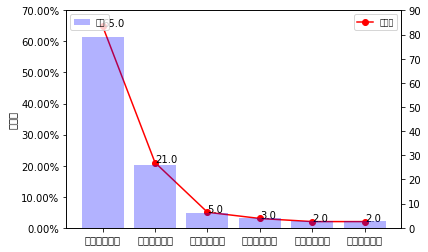

In [71]:

#python 画柱状图折线图
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
# from matplotlib.font_manager import FontProperties
# font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
a=count['人数'].tolist()  #数据
b=count['占比'].tolist()
l=[i for i in range(6)]

# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

fmt='%.2f%%'
yticks = mtick.FormatStrFormatter(fmt)  #设置百分比形式的坐标轴
lx=count['客户类型'].tolist()

fig = plt.figure()  
ax1 = fig.add_subplot(111)  
ax1.plot(l, b,'or-',label=u'增长率');
ax1.yaxis.set_major_formatter(yticks)
for i,(_x,_y) in enumerate(zip(l,b)):  
    plt.text(_x,_y,b[i],color='black',fontsize=10,)  #将数值显示在图形上
ax1.legend(loc=1)
ax1.set_ylim([0, 70]);
ax1.set_ylabel('增长率');
plt.legend(prop={'family':'SimHei','size':8})  #设置中文
ax2 = ax1.twinx() # this is the important function  
plt.bar(l,a,alpha=0.3,color='blue',label=u'产量')  
ax2.legend(loc=2)
ax2.set_ylim([0, 90])  #设置y轴取值范围
plt.legend(prop={'family':'SimHei','size':8},loc="upper left") 
plt.xticks(l,lx)
plt.show()



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,28,56,84,112,float('inf')],labels = [5,4,3,2,1],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,11,22,33,44,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,280,560,840,1120,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)

rfm['R是否大于均值'] = (rfm['R-SCORE'] > rfm['R-SCORE'].mean()) * 1
rfm['F是否大于均值'] = (rfm['F-SCORE'] > rfm['F-SCORE'].mean()) * 1
rfm['M是否大于均值'] = (rfm['M-SCORE'] > rfm['M-SCORE'].mean()) * 1

rfm['标签'] = (rfm['R是否大于均值'] * 100) + (rfm['F是否大于均值'] * 10) + (rfm['M是否大于均值'] * 1)
rfm['客户类型'] = rfm['标签'].apply(transform_label)

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count

# a=count['人数'].tolist()
# a.append(10)
# b=count['占比'].tolist()
# b.append(round(10 / 131,2))
# l=[i for i in range(7)]

# fmt='%.2f%%'
# yticks = mtick.FormatStrFormatter(fmt)  #设置百分比形式的坐标轴
# lx=['100', '000', '111', '101', '001', '110','NULL']

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(l, b,'or-',label=u'Proportion');
# ax1.yaxis.set_major_formatter(yticks)
# for i,(_x,_y) in enumerate(zip(l,b)):
#     plt.text(_x,_y,b[i],color='black',fontsize=10,)  #将数值显示在图形上
# ax1.set_ylim([0, 0.7]);
# ax1.set_ylabel('proportion');
# ax2 = ax1.twinx() # this is the important function
# plt.bar(l,a,alpha=0.3,color='blue',label=u'# of users')
# ax2.set_ylim([0, 90])  #设置y轴取值范围
# plt.xticks(l,lx)
# plt.title("RFM Model using Five-Division")
# plt.show()

,客户类型,人数,占比
0,一般发展客户,79,0.65
1,一般挽留客户,26,0.21
2,重要价值客户,6,0.05
3,重要发展客户,4,0.03
4,重要挽留客户,3,0.02
5,一般价值客户,3,0.02


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '001':'重要挽留客户',
        '101':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '000':'一般挽留客户',
        '100':'一般发展客户'
    }
    result = d[label]
    return result

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['客户类型'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) 

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count

# a=count['人数'].tolist()
# a.append(10)
# b=count['占比'].tolist()
# b.append(round(10 / 131,2))
# l=[i for i in range(7)]

# fmt='%.2f%%'
# yticks = mtick.FormatStrFormatter(fmt)  #设置百分比形式的坐标轴
# lx=['100', '000', '111', '101', '001', '110','NULL']

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(l, b,'or-',label=u'Proportion');
# ax1.yaxis.set_major_formatter(yticks)
# for i,(_x,_y) in enumerate(zip(l,b)):
#     plt.text(_x,_y,b[i],color='black',fontsize=10,)  #将数值显示在图形上
# ax1.set_ylim([0, 0.5]);
# ax1.set_ylabel('proportion');
# ax2 = ax1.twinx() # this is the important function
# plt.bar(l,a,alpha=0.3,color='blue',label=u'# of users')
# ax2.set_ylim([0, 60])  #设置y轴取值范围
# plt.xticks(l,lx)
# plt.title("RFM Model using Mean Value")
# plt.show()


,客户类型,人数,占比
0,一般挽留客户,50,0.41
1,一般发展客户,35,0.29
2,重要保持客户,15,0.12
3,重要挽留客户,8,0.07
4,一般保持客户,8,0.07
5,重要发展客户,5,0.04


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,18,float('inf')],labels = [1,0],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,5,float('inf')],labels = [0,1],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,94,float('inf')],labels = [0,1],right = False).astype(float)

rfm['标签'] = (rfm['R-SCORE'] * 100) + (rfm['F-SCORE'] * 10) + (rfm['M-SCORE'] * 1)
rfm['客户类型'] = rfm['标签'].apply(transform_label)

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count

# a=count['人数'].tolist()
# a.append(10)
# b=count['占比'].tolist()
# b.append(round(10 / 131,2))
# l=[i for i in range(7)]

# fmt='%.2f%%'
# yticks = mtick.FormatStrFormatter(fmt)  #设置百分比形式的坐标轴
# lx=['100', '000', '111', '101', '001', '110','NULL']

# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# ax1.plot(l, b,'or-',label=u'Proportion');
# ax1.yaxis.set_major_formatter(yticks)
# for i,(_x,_y) in enumerate(zip(l,b)):
#     plt.text(_x,_y,b[i],color='black',fontsize=10,)  #将数值显示在图形上
# ax1.set_ylim([0, 0.5]);
# ax1.set_ylabel('proportion');
# ax2 = ax1.twinx() # this is the important function
# plt.bar(l,a,alpha=0.3,color='blue',label=u'# of users')
# ax2.set_ylim([0, 60])  #设置y轴取值范围
# plt.xticks(l,lx)
# plt.title("RFM Model using Pareto principle")
# plt.show()


,客户类型,人数,占比
0,一般发展客户,48,0.40
1,一般挽留客户,36,0.30
2,重要价值客户,13,0.11
3,重要挽留客户,10,0.08
4,重要发展客户,10,0.08
5,一般价值客户,4,0.03


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

def trans_label(x):
    if x == '重要价值客户':
        label = '111'
    elif x == '一般价值客户':
        label = '110'
    elif x == '重要发展客户':
        label = '101'
    elif x == '一般发展客户':
        label = '100'
    elif x == '重要保持客户':
        label = '011'
    elif x == '一般保持客户':
        label = '010'
    elif x == '重要挽留客户':
        label = '001'
    elif x == '一般挽留客户':
        label = '000'
    return label

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,28,56,84,112,float('inf')],labels = [5,4,3,2,1],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,11,22,33,44,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,280,560,840,1120,float('inf')],labels = [1,2,3,4,5],right = False).astype(float)

rfm['R是否大于均值'] = (rfm['R-SCORE'] > rfm['R-SCORE'].mean()) * 1
rfm['F是否大于均值'] = (rfm['F-SCORE'] > rfm['F-SCORE'].mean()) * 1
rfm['M是否大于均值'] = (rfm['M-SCORE'] > rfm['M-SCORE'].mean()) * 1

rfm['标签'] = (rfm['R是否大于均值'] * 100) + (rfm['F是否大于均值'] * 10) + (rfm['M是否大于均值'] * 1)
rfm['客户类型'] = rfm['标签'].apply(transform_label)

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count['标签'] = count['客户类型'].apply(trans_label)
count

,客户类型,人数,占比,标签
0,一般发展客户,79,0.65,100
1,一般挽留客户,26,0.21,000
2,重要价值客户,6,0.05,111
3,重要发展客户,4,0.03,101
4,重要挽留客户,3,0.02,001
5,一般价值客户,3,0.02,110


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def rfm_func(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户',
        '011':'重要保持客户',
        '001':'重要挽留客户',
        '101':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '000':'一般挽留客户',
        '100':'一般发展客户'
    }
    result = d[label]
    return result

def trans_label(x):
    if x == '重要价值客户':
        label = '111'
    elif x == '一般价值客户':
        label = '110'
    elif x == '重要发展客户':
        label = '101'
    elif x == '一般发展客户':
        label = '100'
    elif x == '重要保持客户':
        label = '011'
    elif x == '一般保持客户':
        label = '010'
    elif x == '重要挽留客户':
        label = '001'
    elif x == '一般挽留客户':
        label = '000'
    return label

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['客户类型'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1) 

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count['标签'] = count['客户类型'].apply(trans_label)
count

,客户类型,人数,占比,标签
0,一般挽留客户,50,0.41,000
1,一般发展客户,35,0.29,100
2,重要保持客户,15,0.12,011
3,重要挽留客户,8,0.07,001
4,一般保持客户,8,0.07,010
5,重要发展客户,5,0.04,101


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
def transform_label(x):
    if x == 111:
        label = '重要价值客户'
    elif x == 110:
        label = '一般价值客户'
    elif x == 101:
        label = '重要发展客户'
    elif x == 100:
        label = '一般发展客户'
    elif x == 11:
        label = '重要保持客户'
    elif x == 10:
        label = '一般保持客户'
    elif x == 1:
        label = '重要挽留客户'
    elif x == 0:
        label = '一般挽留客户'
    return label

def trans_label(x):
    if x == '重要价值客户':
        label = '111'
    elif x == '一般价值客户':
        label = '110'
    elif x == '重要发展客户':
        label = '101'
    elif x == '一般发展客户':
        label = '100'
    elif x == '重要保持客户':
        label = '011'
    elif x == '一般保持客户':
        label = '010'
    elif x == '重要挽留客户':
        label = '001'
    elif x == '一般挽留客户':
        label = '000'
    return label

df = pd.read_excel("~/desktop/实训模拟数据.xlsx")

df1 = pd.concat([df.loc[:,'用户id'], df.loc[:,'用户最近一次下单距今天数'], df.loc[:,'用户近30天支付订单数'], df.loc[:,'用户累计支付金额']], axis='columns')
df1.drop_duplicates()
df1.isnull().sum()

df2 = df1.dropna(axis=0,how='any')
df2 = df2.sort_values(by=['用户最近一次下单距今天数'],ascending=False)
df2=df2.reset_index(drop=True)

rfm = df2.pivot_table(index='用户id',
                              values=['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额'],
                              aggfunc={'用户最近一次下单距今天数':'max',
                                       '用户近30天支付订单数':'sum',
                                       '用户累计支付金额':'sum'})
rfm=rfm[['用户最近一次下单距今天数','用户近30天支付订单数','用户累计支付金额']]
rfm.rename(columns={'用户最近一次下单距今天数':'R', '用户近30天支付订单数':'F','用户累计支付金额':'M'},inplace=True)

rfm['R-SCORE'] = pd.cut(rfm['R'],bins = [0,18,float('inf')],labels = [1,0],right = False).astype(float)
rfm['F-SCORE'] = pd.cut(rfm['F'],bins = [0,5,float('inf')],labels = [0,1],right = False).astype(float)
rfm['M-SCORE'] = pd.cut(rfm['M'],bins = [0,94,float('inf')],labels = [0,1],right = False).astype(float)

rfm['标签'] = (rfm['R-SCORE'] * 100) + (rfm['F-SCORE'] * 10) + (rfm['M-SCORE'] * 1)
rfm['客户类型'] = rfm['标签'].apply(transform_label)

count = rfm['客户类型'].value_counts().reset_index()
count.columns = ['客户类型','人数']
count['占比'] = round(count['人数'] / count['人数'].sum(),2)
count['标签'] = count['客户类型'].apply(trans_label)
count

,客户类型,人数,占比,标签
0,一般发展客户,48,0.40,100
1,一般挽留客户,36,0.30,000
2,重要价值客户,13,0.11,111
3,重要挽留客户,10,0.08,001
4,重要发展客户,10,0.08,101
5,一般价值客户,4,0.03,110
